# mnist

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.size

47040000

In [4]:
X_test.size

7840000

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

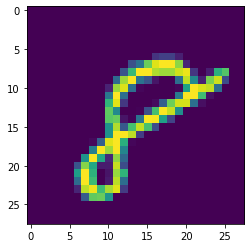

In [9]:
plt.imshow(X_train[-1])

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D,Flatten

In [13]:
X_train.shape

(60000, 28, 28)

In [16]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_train = to_categorical(Y_train,10)
y_test = to_categorical(Y_test,10)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
X_train = X_train.reshape(60000,28,28,1)

In [0]:
X_test = X_test.reshape(10000,28,28,1)

In [27]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten, Dropout

In [0]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))


# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [33]:
model.fit(X_train,y_train,epochs=12,batch_size=128)

Epoch 1/12
60000/60000 [==============================] - 10s 164us/step - loss: 0.2292 - accuracy: 0.9305
Epoch 2/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.0675 - accuracy: 0.9788
Epoch 3/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.0482 - accuracy: 0.9850
Epoch 4/12
60000/60000 [==============================] - 3s 48us/step - loss: 0.0392 - accuracy: 0.9877
Epoch 5/12
60000/60000 [==============================] - 3s 46us/step - loss: 0.0312 - accuracy: 0.9902
Epoch 6/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.0272 - accuracy: 0.9913
Epoch 7/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.0232 - accuracy: 0.9925
Epoch 8/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.0198 - accuracy: 0.9937
Epoch 9/12
60000/60000 [==============================] - 3s 44us/step - loss: 0.0157 - accuracy: 0.9952
Epoch 10/12
60000/60000 [============================

In [34]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 85us/step


[0.025452488770079072, 0.9922999739646912]

In [0]:
from sklearn.metrics import classification_report

In [0]:
predictions = model.predict_classes(X_test)

In [38]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

